In [18]:
import numpy as np
import pandas as pd
import seaborn as sns


In [44]:
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
df.describe(include='all')


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [26]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(403)

## **Data Cleaning**


In [32]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [33]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [34]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
df['target'] = le.fit_transform(df['target'])

In [39]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:

df = df.drop_duplicates(keep='first')

In [41]:
df.shape


(5169, 2)

# **EDA**

In [42]:

df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

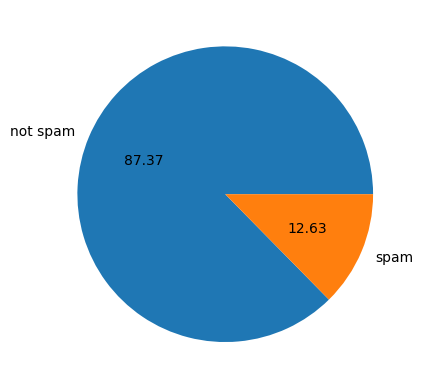

In [53]:
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [54]:
#imbalnce!!!

In [55]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.5 MB 991.0 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.5 MB 2.8 MB/s eta 0:00:01
     ----------- ---------------------------- 0.4/1.5 MB 3.9 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 7.4 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/274.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/274.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/274.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/274.0 kB ? eta -:--:--
     ----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rohit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [60]:
import nltk

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [57]:
df['no_of_chars'] = df['text'].apply(len)

C:\Users\rohit\AppData\Local\Temp\ipykernel_2688\3097365788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_chars'] = df['text'].apply(len)


In [58]:
df.head()

,target,text,no_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
df['no_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [65]:
df['no_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [72]:
df.head()


,target,text,no_of_chars,no_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [80]:
df[df['target'] == 0][['no_of_chars','no_words','no_of_sentences']].describe()

,no_of_chars,no_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [82]:
#spam
df[df['target'] == 1][['no_of_chars','no_words','no_of_sentences']].describe()

,no_of_chars,no_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_of_chars', ylabel='Count'>

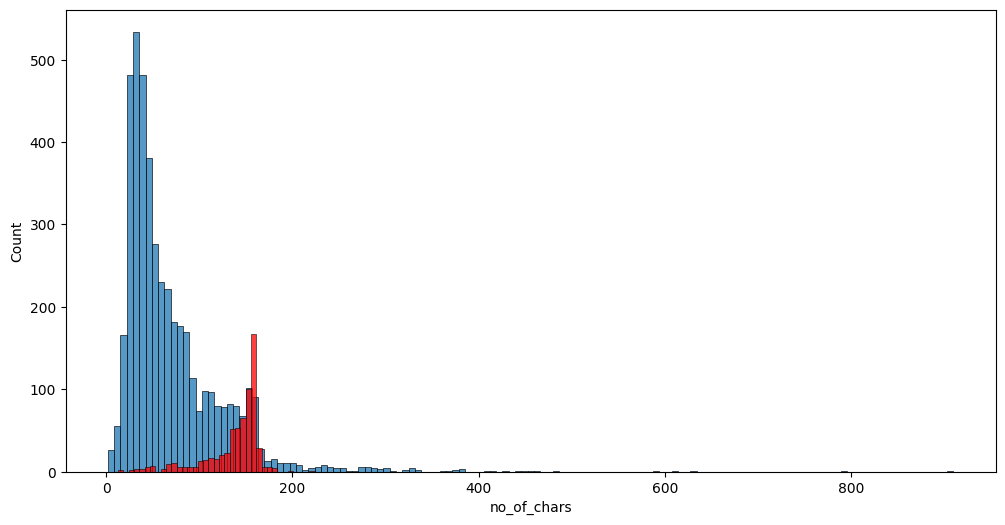

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['no_of_chars'])
sns.histplot(df[df['target'] == 1]['no_of_chars'],color='red')

<Axes: xlabel='no_words', ylabel='Count'>

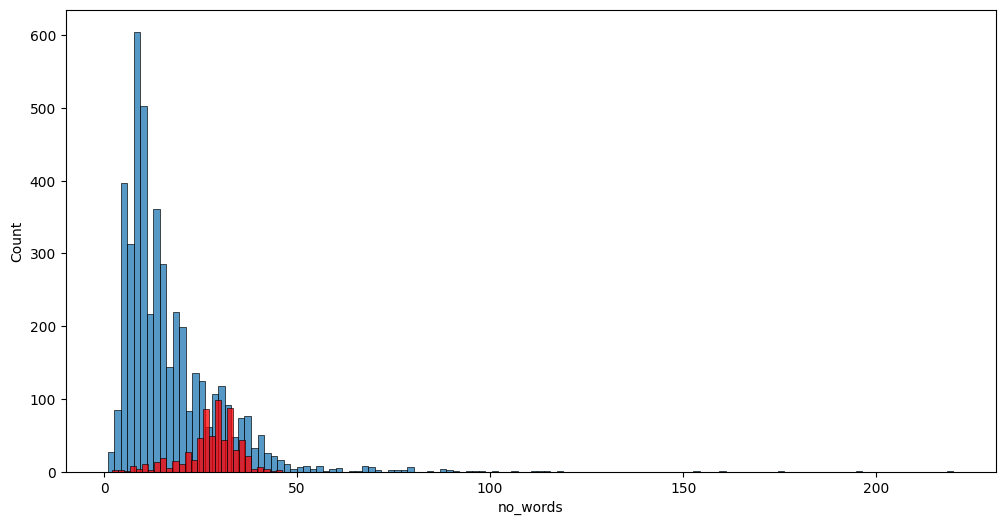

In [86]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['no_words'])
sns.histplot(df[df['target'] == 1]['no_words'],color='red')

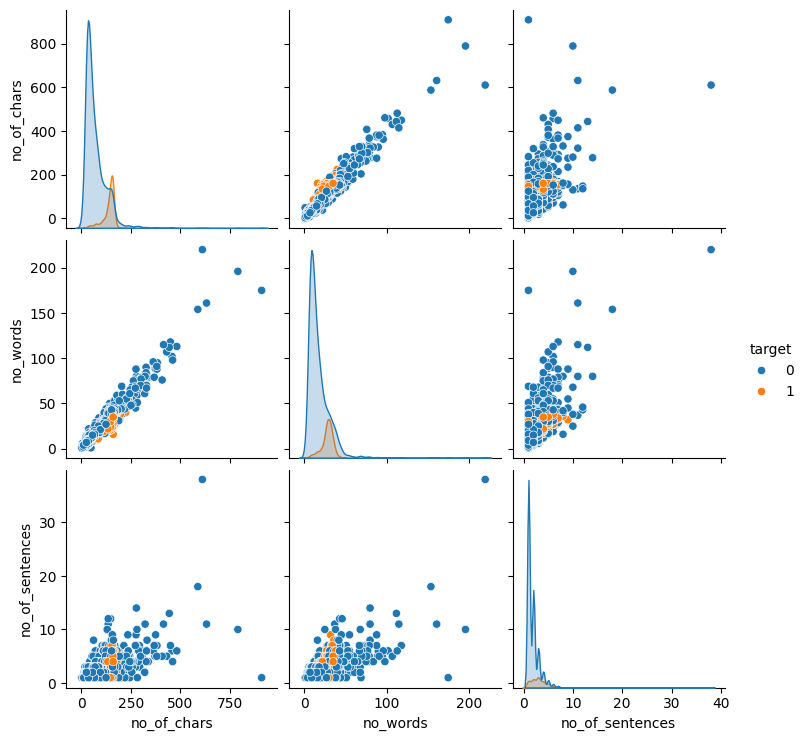

In [87]:
sns.pairplot(df,hue='target')

# 3. Data Preprocessing
Lower case<br>
Tokenization<br>
Removing special characters<br>
Removing stop words and punctuation<br>
Stemming<br>

In [99]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): #remove special chars and emojis
            y.append(i)
    
    text = y[:] # similiar to assigning temp and getting it back
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #remove punctuation
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) #stemming
    
            
    return " ".join(y)

In [101]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [91]:
from nltk.corpus import stopwords
import string


In [94]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [102]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [103]:
df['transformed_text'] = df['text'].apply(transform_text)

In [106]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [107]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

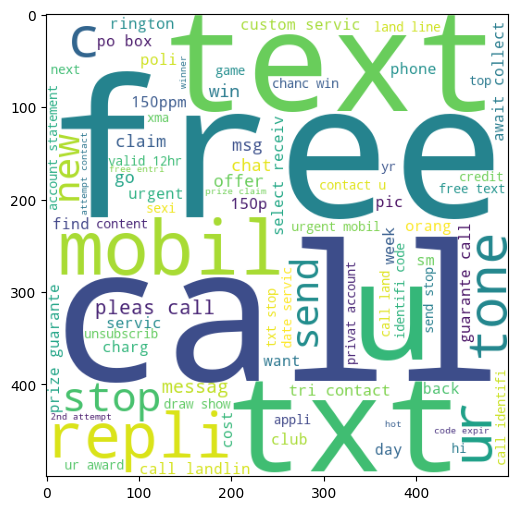

In [108]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [109]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

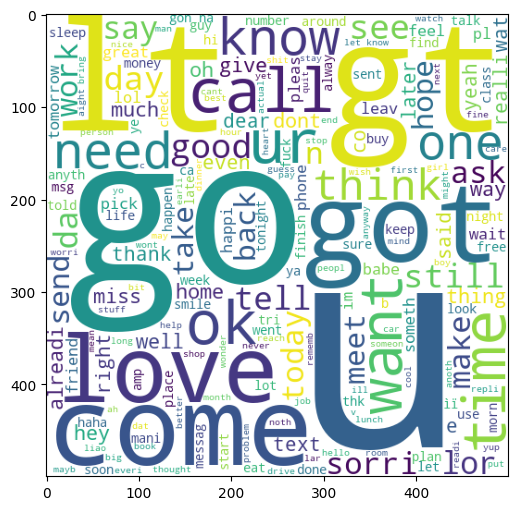

In [110]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [111]:
df.head()

,target,text,no_of_chars,no_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [105]:
!pip install wordCloud

     ---------------------------------------- 0.0/299.8 kB ? eta -:--:--
     ----------- --------------------------- 92.2/299.8 kB 1.7 MB/s eta 0:00:01
     ---------------------------- --------- 225.3/299.8 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 299.8/299.8 kB 2.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rohit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [112]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [113]:
len(spam_corpus)

9939

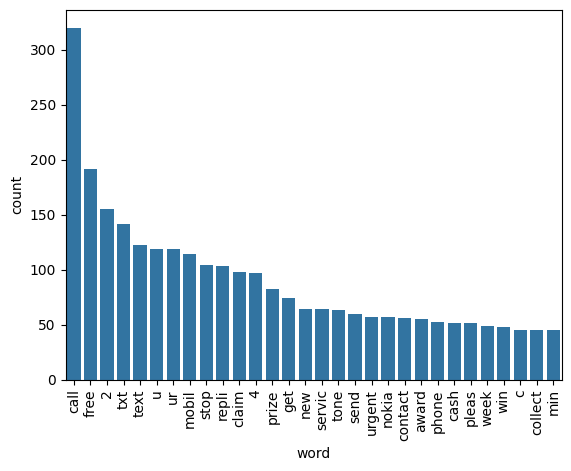

In [125]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word', 'count'])
#counter stores a dicionary
sns.barplot(x='word', y='count', data=most_common_words)

# Returns a list of the 30 most frequent words, in descending order of frequency.

# Each element is a tuple: (word, count)

# Converts the list of tuples into a pandas DataFrame.

# The first element of each tuple (word) goes into the 'word' column.

# The second element (count) goes into the 'count' column.
plt.xticks(rotation='vertical')
plt.show()

In [126]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [127]:
len(ham_corpus)

35404

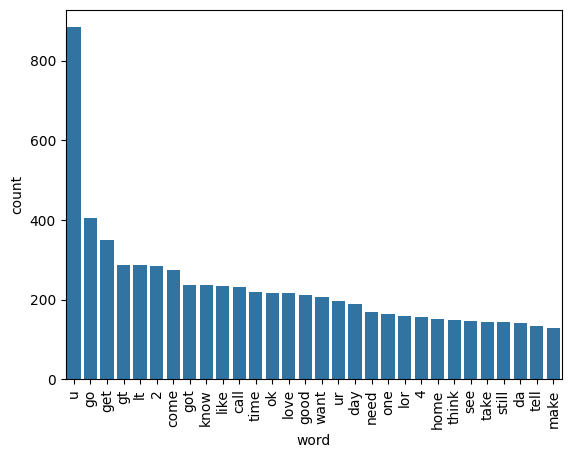

In [129]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word', 'count'])
#counter stores a dicionary
sns.barplot(x='word', y='count', data=most_common_words)

# Returns a list of the 30 most frequent words, in descending order of frequency.

# Each element is a tuple: (word, count)

# Converts the list of tuples into a pandas DataFrame.

# The first element of each tuple (word) goes into the 'word' column.

# The second element (count) goes into the 'count' column.
plt.xticks(rotation='vertical')
plt.show()

In [130]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,no_of_chars,no_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [153]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=1000)

In [154]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [155]:
X.shape

(5169, 1000)

In [156]:
y = df['target'].values

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [158]:
mnb = MultinomialNB()

In [159]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))